<div style="background-color: #007bff; border-radius: 5px; width: 100%; padding: 10px; color: white">
    <b>Note:</b> This guide is written for an interactive environment such as Jupyter notebooks. The interactive widgets will not work in a static version of this documentation. 
    
Instructions for installing Panel and the example notebooks can be found in the <a href="https://panel.holoviz.org/#installation" target="_blank" style="color:white">Installation Guide</a>
</div>



Panel lets you add interactive controls for just about anything you can display in Python. Panel can help you build simple interactive apps, complex multi-page dashboards, or anything in between. As a simple example, let's say we have loaded the [UCI ML dataset measuring the environment in a meeting room](http://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+):

In [7]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt

data = pd.read_csv('../Occupancy/datatraining.txt')
data['date'] = data.date.astype('datetime64[ns]')
data = data.set_index('date')

data.tail()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1
2015-02-10 09:33:00,21.10,36.2000,447.0,821.000000,0.005612,1


And we've written some code that smooths a time series and plots it using Matplotlib with outliers highlighted:

In [8]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas

%matplotlib inline

def mpl_plot(avg, highlight):
    fig = Figure()
    FigureCanvas(fig) # not needed in mpl >= 3.1
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='Temperature', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

We can call the function with parameters and get a plot:

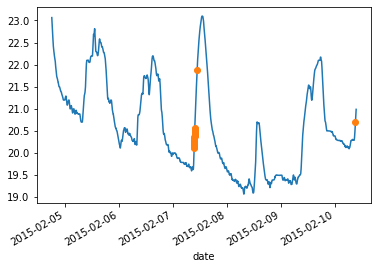

In [9]:
find_outliers(variable='Temperature', window=20, sigma=10)

It works! But exploring all these parameters by typing Python is slow and tedious. Plus we want our boss, or the boss's boss, to be able to try it out.

If we wanted to try out lots of combinations of these values to understand how the window and sigma affect the plot, we could reevaluate the above cell lots of times, but that would be a slow and painful process, and is only really appropriate for users who are comfortable with editing Python code. In the next few examples we will demonstrate how to use Panel to quickly add some interactive controls to some object and make a simple app. 

To see an overview of the different APIs Panel offers see the [API user guide](../user_guide/APIs.ipynb) and for a quick reference for various Panel functionality see the [overview](../user_guide/Overview.ipynb).

## Interactive Panels

Instead of editing code, it's much quicker and more straightforward to use sliders to adjust the values interactively.  You can easily make a Panel app to explore a function's parameters using `pn.interact`, which is similar to the [ipywidgets interact function](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html):

Traceback (most recent call last):
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\pyviz_comms\__init__.py", line 325, in _handle_msg
 self._on_msg(msg)
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\panel\viewable.py", line 259, in _on_msg
 doc.unhold()
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\bokeh\document\document.py", line 668, in unhold
 self._trigger_on_change(event)
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\bokeh\document\document.py", line 1151, in _trigger_on_change
 self._with_self_as_curdoc(event.callback_invoker)
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\bokeh\document\document.py", line 1169, in _with_self_as_curdoc
 return f()
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\bokeh\util\callback_manager.py", line 155, in invoke
 callback(attr, old, new)
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\panel\reactive.py", line 216, in _comm_change
 self._process_events({attr: new})
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\panel\reactive.py", line 187, in _process_events
 self.param.set_param(**self._process_property_change(events))
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\param\parameterized.py", line 1472, in set_param
 self_._batch_call_watchers()
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\param\parameterized.py", line 1611, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\param\parameterized.py", line 1573, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\panel\interact.py", line 191, in update_pane
 new_object = self.object(**self.kwargs)
 File "<ipython-input-8-162f46d094d2>", line 15, in find_outliers
 avg = data[variable].rolling(window=window).mean()
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\pandas\core\generic.py", line 11236, in rolling
 return Rolling(
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\pandas\core\window\rolling.py", line 113, in __init__
 self.validate()
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\pandas\core\window\rolling.py", line 1923, in validate
 raise ValueError("window must be non-negative")
ValueError: window must be non-negative
 


 Traceback (most recent call last):
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\pyviz_comms\__init__.py", line 325, in _handle_msg
 self._on_msg(msg)
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\panel\viewable.py", line 259, in _on_msg
 doc.unhold()
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\bokeh\document\document.py", line 668, in unhold
 self._trigger_on_change(event)
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\bokeh\document\document.py", line 1151, in _trigger_on_change
 self._with_self_as_curdoc(event.callback_invoker)
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\bokeh\document\document.py", line 1169, in _with_self_as_curdoc
 return f()
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\bokeh\util\callback_manager.py", line 155, in invoke
 callback(attr, old, new)
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\panel\reactive.py", line 216, in _comm_change
 self._process_events({attr: new})
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\panel\reactive.py", line 187, in _process_events
 self.param.set_param(**self._process_property_change(events))
 File "C:\Users\Ali DOUCOURE\anaconda3\envs\intro-conda\lib\site-packages\param\parameterized.py", line 1472, in set_param
 self_._batch_cal

Column
    [0] Column
        [0] IntSlider(end=90, name='window', start=-30, value=30, value_throttled=30)
        [1] IntSlider(end=30, name='sigma', start=-10, value=10, value_throttled=10)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00007')
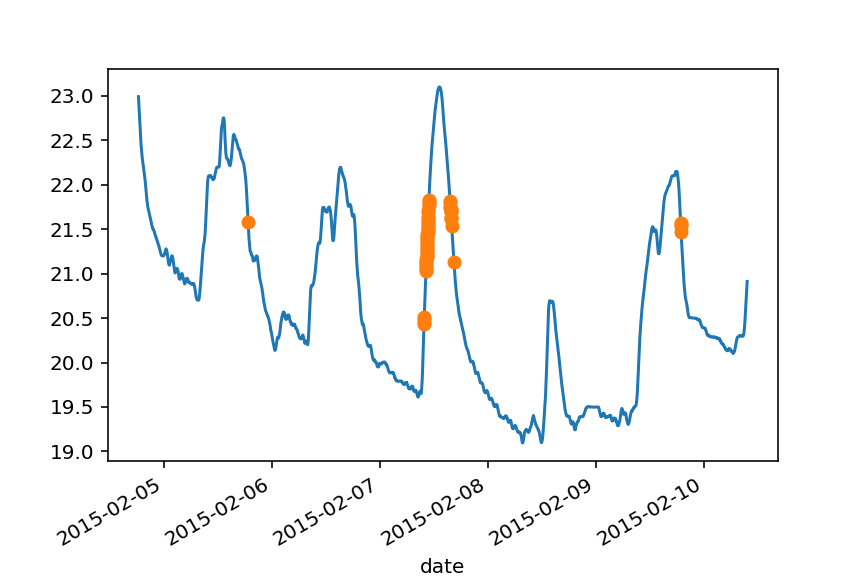

In [10]:
import panel as pn
pn.extension()

pn.interact(find_outliers)

As long as you have a live Python process running, dragging these widgets will trigger a call to the `find_outliers` callback function, evaluating it for whatever combination of parameter values you select and displaying the results. A Panel like this makes it very easy to explore any function that produces a visual result of a [supported type](https://github.com/pyviz/panel/issues/2), such as Matplotlib (as above), Bokeh, Plotly, Altair, or various text and image types.

## Components of Panels

`interact` is convenient, but what if you want more control over how it looks or works?  First, let's see what `interact` actually creates, by grabbing that object and displaying its representation:

In [13]:
kw = dict(window=(1, 60), variable=sorted(list(data.columns)), sigma=(1, 20))
i = pn.interact(find_outliers, **kw)
i.pprint()

Column
    [0] Column
        [0] Select(name='variable', options=['CO2', 'Humidity', ...], value='Temperature')
        [1] IntSlider(end=60, name='window', start=1, value=30, value_throttled=30)
        [2] IntSlider(end=20, name='sigma', start=1, value=10, value_throttled=10)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00036')


As you can see, the `interact` call created a `pn.Column` object consisting of a WidgetBox (with 3 widgets) and a `pn.Row` with one Matplotlib figure object.  Panel is compositional, so you can mix and match these components any way you like, adding other objects as needed:

Row
    [0] Matplotlib(Figure, name='interactive00036')
    [1] Column
        [0] Markdown(str)
        [1] Select(name='variable', options=['CO2', 'Humidity', ...], value='Temperature')
        [2] IntSlider(end=60, name='window', start=1, value=30, value_throttled=30)
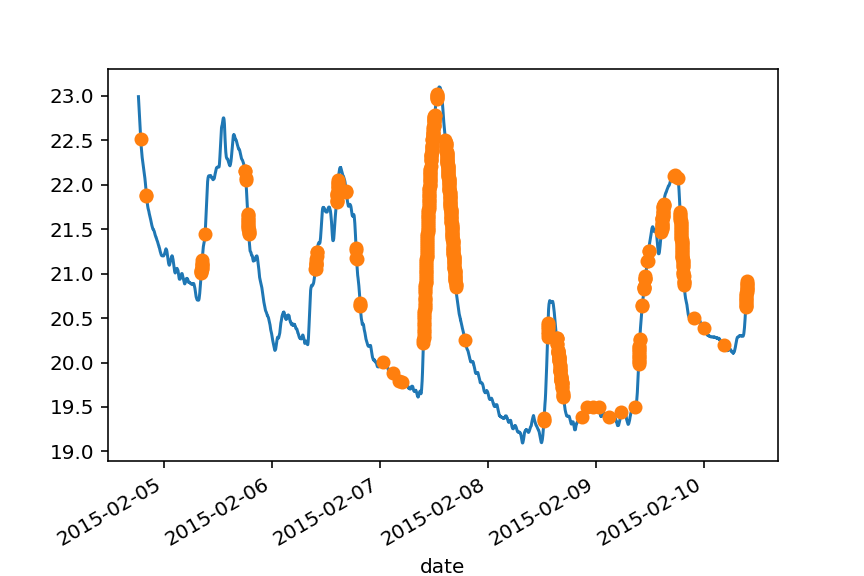

In [18]:
text = "<br>\n# Room Occupancy\nSelect the variable, and the time window for smoothing"

p = pn.Row(i[1][0], pn.Column(text, i[0][0], i[0][1]))
p

Note that the widgets stay linked to their plot even if they are in a different notebook cell:

In [16]:
i[0][2]

IntSlider(end=20, name='sigma', start=1, value=5, value_throttled=10)

Also note that Panel widgets are reactive, so they will update even if you set the values by hand:

In [15]:
i[0][2].value = 5

## Composing new Panels

You can use this compositional approach to combine different components such as widgets, plots, text, and other elements needed for an app or dashboard in arbitrary ways. The ``interact`` example builds on a reactive programming model, where an input to the function changes and Panel reactively updates the output of the function. ``interact`` is a convenient way to create widgets from the arguments to your function automatically, but Panel also provides a more explicit reactive API letting you specifically define connections between widgets and function arguments, and then lets you compose the resulting dashboard manually from scratch.

In the example below we explicitly declare each of the components of an app: widgets, a function to return the plot, column and row containers, and the completed `occupancy` Panel app. Widget objects have multiple "parameters" (current value, allowed ranges, and so on), and here we will use Panel's ``bind`` function to declare that function's input values should come from the widgets' ``value`` parameters. Now when the function and the widgets are displayed, Panel will automatically update the displayed output whenever any of the inputs change:

Row
    [0] ParamFunction(function)
    [1] Column
        [0] Markdown(str)
        [1] RadioButtonGroup(name='variable', options=['Temperature', ...], value='Temperature')
        [2] IntSlider(end=60, name='window', start=1, value=10, value_throttled=10)
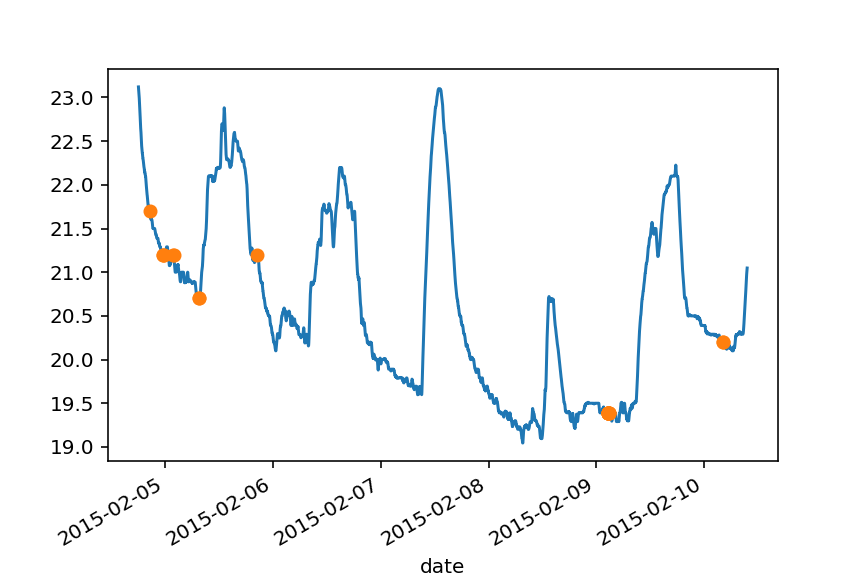

In [17]:
import panel.widgets as pnw

variable  = pnw.RadioButtonGroup(name='variable', value='Temperature', 
                                 options=list(data.columns))
window  = pnw.IntSlider(name='window', value=10, start=1, end=60)

reactive_outliers = pn.bind(find_outliers, variable, window, 10)

widgets   = pn.Column("<br>\n# Room occupancy", variable, window)
occupancy = pn.Row(reactive_outliers, widgets)
occupancy

## Deploying Panels

The above panels all work in the notebook cell (if you have a live Jupyter kernel running), but unlike other approaches such as ipywidgets, Panel apps work just the same in a standalone server. For instance, the app above can be launched as its own web server on your machine by uncommenting and running the following cell:

In [ ]:
#occupancy.show()

Or, you can simply mark whatever you want to be in the separate web page with `.servable()`, and then run the shell command `panel serve --show Introduction.ipynb` to launch a server containing that object. (Here, we've also added a semicolon to avoid getting another copy of the occupancy app here in the notebook.)

In [ ]:
occupancy.servable();

During development, particularly when working with a raw script using `panel serve --show --autoreload` can be very useful as the application will automatically update whenever the script or notebook or any of its imports change.

## Declarative Panels

The above compositional approach is very flexible, but it ties your domain-specific code (the parts about sine waves) with your widget display code. That's fine for small, quick projects or projects dominated by visualization code, but what about large-scale, long-lived projects, where the code is used in many different contexts over time, such as in large batch runs, one-off command-line usage, notebooks, and deployed dashboards?  For larger projects like that, it's important to be able to separate the parts of the code that are about the underlying domain (i.e. application or research area) from those that are tied to specific display technologies (such as Jupyter notebooks or web servers). 

For such usages, Panel supports objects declared with the separate [Param](http://param.pyviz.org) library, which provides a GUI-independent way of capturing and declaring the parameters of your objects (and dependencies between your code and those parameters), in a way that's independent of any particular application or dashboard technology. For instance, the above code can be captured in an object that declares the ranges and values of all parameters, as well as how to generate the plot, independently of the Panel library or any other way of interacting with the object:

In [34]:
import param

class RoomOccupancy(param.Parameterized):
    variable  = param.Selector(objects=list(data.columns))
    window    = param.Integer(default=10, bounds=(1, 20))
    sigma     = param.Number(default=10, bounds=(0, 20))

    def view(self):
        return find_outliers(self.variable, self.window, self.sigma)
    
obj = RoomOccupancy()
obj

RoomOccupancy(name='RoomOccupancy00253', sigma=10, variable='Temperature', window=10)

The `RoomOccupancy` class and the `obj` instance have no dependency on Panel, Jupyter, or any other GUI or web toolkit; they simply declare facts about a certain domain (such as that smoothing requires window and sigma parameters, and that window is an integer greater than 0 and sigma is a positive real number).  This information is then enough for Panel to create an editable and viewable representation for this object without having to specify anything that depends on the domain-specific details encapsulated in `obj`:

Row
    [0] Column(margin=5, name='RoomOccupancy', width=300)
        [0] StaticText(value='<b>RoomOccupancy</b>')
        [1] Select(name='Variable', options=OrderedDict([('Temperature...]), value='Temperature')
        [2] IntSlider(end=20, name='Window', start=1, value=10, value_throttled=10)
        [3] FloatSlider(end=20, name='Sigma', value=10, value_throttled=10)
    [1] ParamMethod(method)
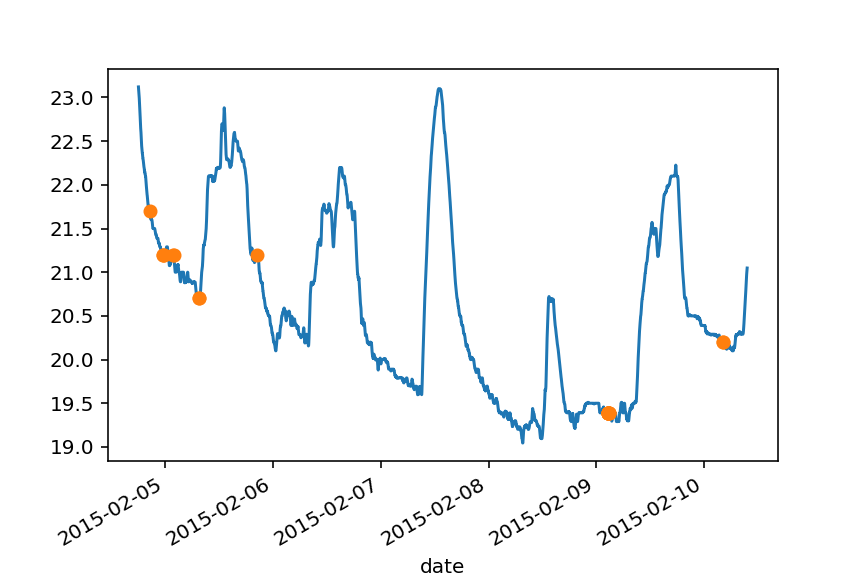

In [35]:
pn.Row(obj.param, obj.view)

To support a particular domain, you can create hierarchies of such classes encapsulating all the parameters and functionality you need across different families of objects, with both parameters and code inheriting across the classes as appropriate, all without any dependency on a particular GUI library or even the presence of a GUI at all.  This approach makes it practical to maintain a large codebase, all fully displayable and editable with Panel, in a way that can be maintained and adapted over time.

## Linking plots and actions between panes

The above approaches each work with a very wide variety of displayable objects, including images, equations, tables, and plots. In each case, Panel provides interactive functionality using widgets and updates the displayed objects accordingly, while making very few assumptions about what actually is being displayed. Panel also supports richer, more dynamic interactivity where the displayed object is itself interactive, such as the JavaScript-based plots from  Bokeh and Plotly.

For instance, if we substitute the [Bokeh](http://bokeh.pydata.org) wrapper [hvPlot](http://hvplot.pyviz.org) for the Matplotlib wrapper provided with Pandas, we automatically get interactive plots that allow zooming, panning and hovering:

In [37]:
import hvplot.pandas

def hvplot(avg, highlight):
    return avg.hvplot(height=200) * highlight.hvplot.scatter(color='orange', padding=0.1)

text2 = "## Room Occupancy\nSelect the variable and the smoothing values"
hvp   = pn.interact(find_outliers, view_fn=hvplot, **kw)
pn.Column(pn.Row(pn.panel(text2, width=400), hvp[0]), hvp[1]).servable("Occupancy")

ImportError: cannot import name 'hvPlotTabular' from 'hvplot' (unknown location)

These interactive actions can be combined with more complex interactions with a plot (e.g. tap, hover) to make it easy to explore data more deeply and uncover connections. For instance, we can use HoloViews to make a more full-featured version of the hvPlot example that displays a table of the current measurement values at the hover position on the plot:

In [33]:
import holoviews as hv

tap = hv.streams.PointerX(x=data.index.min())

def hvplot2(avg, highlight):
    line = avg.hvplot(height=300, width=500)
    outliers = highlight.hvplot.scatter(color='orange', padding=0.1)
    tap.source = line
    return (line * outliers).opts(legend_position='top_right')

@pn.depends(tap.param.x)
def table(x):
    index = np.abs((data.index - x).astype(int)).argmin()
    return data.iloc[index]

app = pn.interact(find_outliers, view_fn=hvplot2, **kw)

pn.Row(
    pn.Column("## Room Occupancy\nHover over the plot for more information.", app[0]),
    pn.Row(app[1], table)
)

AttributeError: 'Series' object has no attribute 'hvplot'

## Exploring further

For a quick reference of different Panel functionality refer to the [overview](../user_guide/Overview.ipynb). If you want a more detailed description of different ways of using Panel, each appropriate for different applications see the following materials:

- [APIs](../user_guide/APIs.ipynb): An overview of the different APIs offered by Panel.
- [Interact](../user_guide/Interact.ipynb): Instant GUI, given a function with arguments
- [Widgets](../user_guide/Widgets.ipynb): Explicitly instantiating widgets and linking them to actions
- [Parameters](../user_guide/Param.ipynb): Capturing parameters and their links to actions declaratively

Just pick the style that seems most appropriate for the task you want to do, then study that section of the user guide. Regardless of which approach you take, you'll want to learn more about Panel's panes and layouts:

- [Components](../user_guide/Components.ipynb): An overview of the core components of Panel including Panes, Widgets and Layouts
- [Customization](../user_guide/Customization.ipynb): How to set styles and sizes of Panel components
- [Deploy & Export](../user_guide/Deploy_and_Export.ipynb): An overview on how to display, export and deploy Panel apps and dashboards


Finally, if you are building a complex multi-stage application, you can consider our support for organizing workflows consisting of multiple stages:

- [Pipelines](../user_guide/Pipelines.ipynb): Making multi-stage processing pipelines in notebooks and as deployed apps

Or for more polished apps you can make use of Templates to achieve exactly the look and feel you want:

- [Templates](../user_guide/Templates.ipynb): Composing one or more Panel objects into jinja2 template with full control over layout and styling.